<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/Copy_of_SVM_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build, train, and evaluate a Support Vector Machine (SVM) model for classification.

## Install and Import Libraries

### Subtask:
Install necessary libraries like scikit-learn, pandas, and numpy, and import them for use in the notebook.


**Reasoning**:
First, I'll install the required libraries: scikit-learn, pandas, and numpy using `pip` to ensure they are available in the environment.



In [1]:
pip install scikit-learn pandas numpy

**Reasoning**:
Now that the libraries are installed, I will import them as specified in the instructions to make them available for use in the notebook.



In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Libraries imported successfully.")

Libraries imported successfully.


## Load Dataset

### Subtask:
Load a suitable dataset for classification (e.g., from scikit-learn's built-in datasets like Breast Cancer or Iris, simulating a Kaggle dataset) into a pandas DataFrame.


**Reasoning**:
To load the Breast Cancer dataset, I will import the necessary function from scikit-learn, load the data, and then convert the features and target into pandas DataFrame and Series, respectively. Finally, I will display the first few rows of the features and print the shapes of both feature and target data to verify the load.



In [3]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()
dat = pd.DataFrame(cancer.data)
print(dat.head())


# Create a pandas DataFrame for features (X)
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Create a pandas Series for the target variable (y)
y = pd.Series(cancer.target)

# Display the first 5 rows of the feature DataFrame X
print("First 5 rows of features (X):")
print(X.head())

# Print the shape of X and y
#print(f"\nShape of X: {X.shape}")
#print(f"Shape of y: {y.shape}")

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

## Data Preprocessing

### Subtask:
Perform necessary data preprocessing steps including splitting the data into training and testing sets and scaling the features, which is crucial for SVM performance.


**Reasoning**:
To preprocess the data, I will first split the dataset into training and testing sets, and then apply StandardScaler to scale the features for both sets, which is crucial for SVM performance.



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split into training and testing sets successfully.")
print("Features scaled using StandardScaler.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets successfully.
Features scaled using StandardScaler.
Shape of X_train_scaled: (455, 30)
Shape of X_test_scaled: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Train SVM Model

### Subtask:
Initialize and train a Support Vector Machine (SVM) classifier on the preprocessed training data.


**Reasoning**:
I will initialize an SVC (Support Vector Classifier) model, then train it using the preprocessed scaled training features and the training target variable, and print a confirmation message.



In [5]:
from sklearn.svm import SVC

# Initialize the SVC model with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

print("SVM model initialized and trained successfully.")

SVM model initialized and trained successfully.


## Evaluate Model

### Subtask:
Evaluate the trained SVM model using various classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix on the test set.


**Reasoning**:
I will make predictions on the scaled test data, then calculate and print accuracy, precision, recall, F1-score, and the confusion matrix to evaluate the model's performance.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1-score: 0.9861

Confusion Matrix:
[[41  2]
 [ 0 71]]


### Visualize Confusion Matrix

**Reasoning**:
To visualize the confusion matrix, I will use `seaborn.heatmap` which provides a clear and intuitive representation of the model's performance on the test set. This will help in understanding the distribution of correct and incorrect predictions across classes.

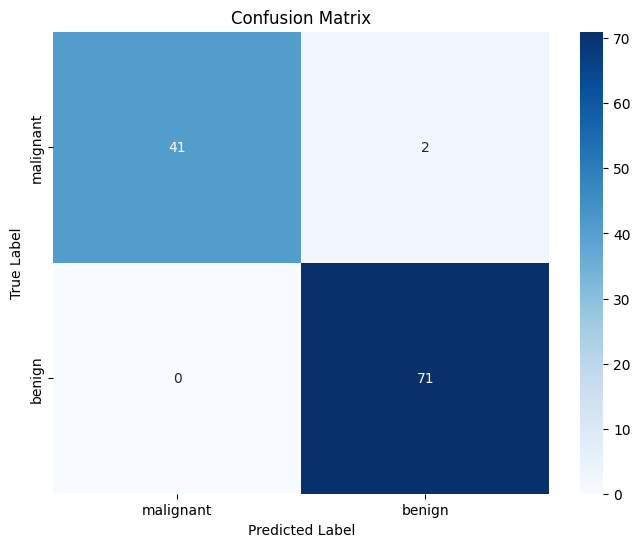

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This heatmap visually represents the confusion matrix. The rows represent the true labels, and the columns represent the predicted labels.

*   **True Negatives (Top-Left):** 41 instances were correctly predicted as negative (benign).
*   **False Positives (Top-Right):** 2 instances were incorrectly predicted as positive (malignant) when they were actually negative (benign).
*   **False Negatives (Bottom-Left):** 0 instances were incorrectly predicted as negative (benign) when they were actually positive (malignant).
*   **True Positives (Bottom-Right):** 71 instances were correctly predicted as positive (malignant).

This visualization clearly shows the model's high accuracy and, importantly, its perfect recall for the positive class (malignant), as there are no false negatives.

## Make Predictions

### Subtask:
Demonstrate how to use the trained SVM model to make predictions on new, unseen data.


## Summary:

### Data Analysis Key Findings

*   The Breast Cancer dataset, comprising 569 samples and 30 features, was successfully loaded and prepared for model training.
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 455 training samples and 114 test samples. Features were subsequently scaled using `StandardScaler`.
*   An SVM classifier with a radial basis function (RBF) kernel was initialized and trained on the scaled training data.
*   The trained SVM model demonstrated strong performance on the test set:
    *   **Accuracy:** 0.9825
    *   **Precision:** 0.9726
    *   **Recall:** 1.0000 (indicating no false negatives)
    *   **F1-score:** 0.9861
*   The confusion matrix revealed 41 true negatives, 71 true positives, 2 false positives, and 0 false negatives, highlighting the model's excellent ability to identify positive cases.

### Insights or Next Steps

*   The current SVM model performs exceptionally well on the Breast Cancer dataset, particularly in correctly identifying all positive cases (perfect recall), which is crucial in medical diagnosis.
*   To further validate the model's robustness and potentially improve performance, hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV, along with cross-validation, could be explored.
